<a href="https://colab.research.google.com/github/DevMed22/slam-dunk-2/blob/soccer-analytics/soccer-analysis/statsbomb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsbombpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 152 kB 13.1 MB/s 
     |████████████████████████████████| 127 kB 58.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 8.2 MB/s 


In [3]:
!pip install highlight_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from statsbombpy import sb 
from mplsoccer.pitch import Pitch,VerticalPitch
from highlight_text import fig_text

## Competitions

In [5]:
com = sb.competitions()

In [6]:
com

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [7]:
com_name = com['competition_name']
com_id = com['competition_id']
season_name = com['season_name']
season_id = com['season_id']

com_dict = dict(zip(com_name,com_id))
season_dict = dict(zip(season_name,season_id))

input :
competition name    list

season name    list 

 button 




In [8]:
com_dict['La Liga']

11

In [9]:
season_dict['2018/2019']

4

## Matches

In [10]:
sb.matches(competition_id=com_dict['La Liga'], season_id=season_dict['2018/2019']).head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,15998,2018-09-26,20:00:00.000,Spain - La Liga,2018/2019,Leganés,Barcelona,2,1,available,...,2021-06-13T16:17:31.694,6,Regular Season,Estadio Municipal de Butarque,Alberto Undiano Mallenco,Mauricio Pellegrino,Ernesto Valverde Tejedor,1.1.0,2,None
1,16029,2018-10-20,20:45:00.000,Spain - La Liga,2018/2019,Barcelona,Sevilla,4,2,available,...,2021-06-13T16:17:31.694,9,Regular Season,Spotify Camp Nou,NaN,Ernesto Valverde Tejedor,Pablo Javier Machín Díez,1.1.0,2,None
2,16073,2018-11-24,20:45:00.000,Spain - La Liga,2018/2019,Atlético Madrid,Barcelona,1,1,available,...,2021-06-13T16:17:31.694,13,Regular Season,Estádio Cívitas Metropolitano,Jesús Gil Manzano,Diego Pablo Simeone,Ernesto Valverde Tejedor,1.1.0,2,None
3,16086,2018-12-08,20:45:00.000,Spain - La Liga,2018/2019,Espanyol,Barcelona,0,4,available,...,2021-06-13T16:17:31.694,15,Regular Season,RCDE Stadium,NaN,Joan Francesc Ferrer Sicilia,Ernesto Valverde Tejedor,1.1.0,2,None
4,16190,2019-02-23,16:15:00.000,Spain - La Liga,2018/2019,Sevilla,Barcelona,2,4,available,...,2021-06-13T16:17:31.694,25,Regular Season,Estadio Ramón Sánchez Pizjuán,Antonio Miguel Mateu Lahoz,Pablo Javier Machín Díez,Ernesto Valverde Tejedor,1.1.0,2,None


In [11]:
x = sb.matches(competition_id=com_dict['La Liga'], season_id=season_dict['2018/2019'])

In [12]:
x.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [13]:
def matches_id(data):
  match_id=[]
  match_name=[]
  match_index=np.arange(0,len(data))
  for i in range(len(data)):
    match_id.append(data['match_id'][i])
    match_name.append(data['home_team'][i]+' vs '+data['away_team'][i]+' '+data['competition_stage'][i])
  match_dict_id = dict(zip(match_name,match_id))
  match_dict_index = dict(zip(match_name,match_index))
  return match_name,match_dict_index,match_dict_id


input 

match name

button 

In [14]:
m_name,m_idx,m_dict_id = matches_id(x)

In [15]:
print(m_dict_id[m_name[5]])

16109


In [16]:
print(m_name)

['Leganés vs Barcelona Regular Season', 'Barcelona vs Sevilla Regular Season', 'Atlético Madrid vs Barcelona Regular Season', 'Espanyol vs Barcelona Regular Season', 'Sevilla vs Barcelona Regular Season', 'Barcelona vs Celta Vigo Regular Season', 'Getafe vs Barcelona Regular Season', 'Barcelona vs Real Valladolid Regular Season', 'Real Betis vs Barcelona Regular Season', 'Athletic Club vs Barcelona Regular Season', 'Barcelona vs Real Sociedad Regular Season', 'Barcelona vs Deportivo Alavés Regular Season', 'Barcelona vs Valencia Regular Season', 'Barcelona vs Leganés Regular Season', 'Barcelona vs Atlético Madrid Regular Season', 'Barcelona vs Real Betis Regular Season', 'Barcelona vs Levante Regular Season', 'Barcelona vs Villarreal Regular Season', 'Girona vs Barcelona Regular Season', 'Deportivo Alavés vs Barcelona Regular Season', 'Barcelona vs Huesca Regular Season', 'Eibar vs Barcelona Regular Season', 'Barcelona vs Eibar Regular Season', 'Barcelona vs Rayo Vallecano Regular Seas

In [17]:
def match_data(data,match_index):
  home_team = data['home_team'][match_index]
  away_team = data['away_team'][match_index]
  home_score = data['home_score'][match_index]
  away_score = data['away_score'][match_index]
  stadium = data['stadium'][match_index]
  home_maneger = data['home_managers'][match_index]
  away_maneger = data['away_managers'][match_index]
  comp_stats = data['competition_stage'][match_index]
  return home_team,away_team,home_score,away_score,stadium,home_maneger,away_maneger,comp_stats

In [18]:
h,w,s1,s2,stad,h_m,a_m,c_s = match_data(x,m_idx[m_name[5]])

In [19]:
print(h,w,s1,s2,stad,h_m,a_m,c_s)

Barcelona Celta Vigo 2 0 Spotify Camp Nou Ernesto Valverde Tejedor José Miguel Azevedo Cardoso Regular Season


home team               |             away team

home score              |             away team

                    stadium 

                     refree

home manager           |             away manager

                  competition stats

lineup
...                                    ...........





  https://www.google.com/search?q=premier+league&sxsrf=ALiCzsa-LQGu9nQZE8SJKXh8Mt79H5urNA%3A1664489375046&ei=nxc2Y6WzAp-C9u8PndOxqAc&oq=pre&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIECCMQJzIECCMQJzIKCC4QsQMQgwEQQzIHCAAQsQMQQzIECAAQQzIECAAQQzIECAAQQzIECC4QQzIECAAQQzoKCAAQRxDWBBCwAzoHCAAQsAMQQzoNCAAQ5AIQ1gQQsAMYAToMCC4QyAMQsAMQQxgCOg8ILhDUAhDIAxCwAxBDGAI6BwguELEDEEM6CAguELEDEIMBOgUIABCABDoLCAAQgAQQsQMQgwE6EQguEIAEELEDEIMBEMcBENEDSgQIQRgASgQIRhgBUMwKWPYQYIAiaARwAXgAgAGVAYgBngKSAQMwLjKYAQCgAQHIARPAAQHaAQYIARABGAnaAQYIAhABGAg&sclient=gws-wiz#sie=m;/g/11s38h46j3;2;/m/02_tc;ln;fp;1;;;

## Lineup

In [ ]:
sb.lineups(match_id=m_dict_id[m_name[5]])[w]

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3625,Sofiane Boufal,None,19,Morocco,[],"[{'position_id': 16, 'position': 'Left Midfiel..."
1,5217,Iago Aspas Juncal,Iago Aspas,10,Spain,"[{'time': '44:56', 'card_type': 'Yellow Card',...","[{'position_id': 22, 'position': 'Right Center..."
2,5516,Pione Sisto Ifolo Emirmija,Pione Sisto,11,Denmark,[],"[{'position_id': 12, 'position': 'Right Midfie..."
3,6297,Maximiliano Gómez González,Maxi Gómez,9,Uruguay,[],"[{'position_id': 24, 'position': 'Left Center ..."
4,6794,Gustavo Daniel Cabral Cáceres,Gustavo Cabral,22,Argentina,[],[]
5,6795,Rubén Blanco Veiga,Rubén Blanco,13,Spain,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
6,6798,Stanislav Lobotka,None,14,Slovakia,[],"[{'position_id': 13, 'position': 'Right Center..."
7,6799,Brais Méndez Portela,Brais Méndez,23,Spain,[],"[{'position_id': 12, 'position': 'Right Midfie..."
8,6805,Hugo Mallo Novegil,Hugo Mallo,2,Spain,[],"[{'position_id': 2, 'position': 'Right Back', ..."
9,6852,Jozabed Sánchez Ruiz,Jozabed Sánchez,21,Spain,[],"[{'position_id': 15, 'position': 'Left Center ..."


In [65]:
def lineups(h,w,data):
  home_lineups=[]
  away_linepus=[]
  for i in range(len(data)):
    home_lineups.append(data[h]['player_name']) 
    away_linepus.append(data[w]['player_name'])
  return home_lineups[0].values,away_linepus[0].values

In [71]:
home_lineups , away_lineups = lineups(h,w,sb.lineups(match_id=m_dict_id[m_name[5]]))
print(home_lineups,'\n\n',away_lineups)

['Philippe Coutinho Correia' 'Sergio Busquets i Burgos' 'Jordi Alba Ramos'
 'Gerard Piqué Bernabéu' 'Luis Alberto Suárez Díaz' 'Ivan Rakitić'
 'Ousmane Dembélé' 'Lionel Andrés Messi Cuccittini' 'Nélson Cabral Semedo'
 'Denis Suárez Fernández' 'Clément Lenglet' 'Arturo Erasmo Vidal Pardo'
 'Jasper Cillessen' 'Arthur Henrique Ramos de Oliveira Melo'
 'Carles Aleña Castillo' 'Marc-André ter Stegen' 'Juan Miranda González'
 'Juan Brandariz Movilla'] 

 ['Sofiane Boufal' 'Iago Aspas Juncal' 'Pione Sisto Ifolo Emirmija'
 'Maximiliano Gómez González' 'Gustavo Daniel Cabral Cáceres'
 'Rubén Blanco Veiga' 'Stanislav Lobotka' 'Brais Méndez Portela'
 'Hugo Mallo Novegil' 'Jozabed Sánchez Ruiz' 'Róbert Mazáň'
 'Sergio Álvarez Conde' 'Andrew Hjulsager' 'Néstor Alejandro Araújo Razo'
 'Francisco José Beltrán Peinado' 'Okay Yokuşlu' 'David Costas Cordal'
 'Kevin Vázquez Comesaña']


## Events

In [ ]:
'Interception'          

'Interception'

In [72]:
events = sb.events(match_id=m_dict_id[m_name[5]], split=True, flatten_attrs=False)

In [77]:
events

defaultdict(list,
            {'starting_xis':                                      id  index  period     timestamp  minute  \
             0  29e09607-2404-485f-81ad-f1771bf9ce9b      1       1  00:00:00.000       0   
             1  d4d2e69a-9c7e-43b6-be09-63a2d49c0264      2       1  00:00:00.000       0   
             
                second         type  possession possession_team  play_pattern        team  \
             0       0  Starting XI           1       Barcelona  Regular Play   Barcelona   
             1       0  Starting XI           1       Barcelona  Regular Play  Celta Vigo   
             
                duration                                            tactics  match_id  \
             0       0.0  {'formation': 41221, 'lineup': [{'player': {'i...     16109   
             1       0.0  {'formation': 442, 'lineup': [{'player': {'id'...     16109   
             
                possession_team_id  
             0                 217  
             1           

In [86]:
events['fouls']

[]

### Shots

In [ ]:
events['shots']['possession_team'][5]

'Celta Vigo'

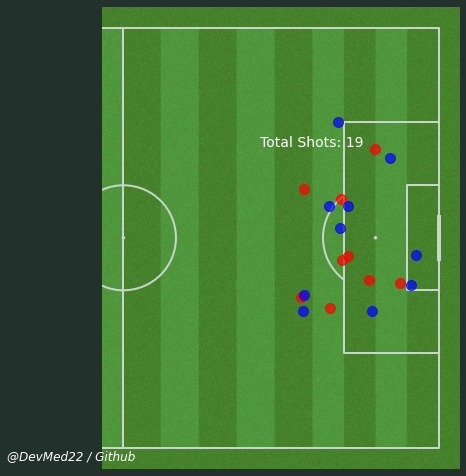

In [89]:
def shots(events):
    fig, ax = plt.subplots(figsize=(13,8.5))
    fig.set_facecolor('#22312b')
    ax.patch.set_facecolor('#22312b')

    #The statsbomb pitch from mplsoccer
    pitch = Pitch(pitch_type='statsbomb', half=True,
                  pitch_color='grass', line_color='#c7d5cc',stripe = True)

    pitch.draw(ax=ax)

    #I invert the axis to make it so I am viewing it how I want
    plt.gca().invert_yaxis()

    #plot the points, you can use a for loop to plot the different outcomes if you want
    x_h=[]
    y_h=[]
    x_w=[]
    y_w=[]
    for i,shot in events['shots'].iterrows():
      if events['shots']['possession_team'][i]==h:
        x_h.append(shot['location'][0])
        y_h.append(shot['location'][1])
      elif events['shots']['possession_team'][i]==w:
        x_w.append(shot['location'][0])
        y_w.append(shot['location'][1]) 

    # for i,shot in events['shots'][].iterrows():
    #     x.append(shot['location'][0])
    #     y.append(shot['location'][1])
        
    plt.scatter(x_h,y_h, s=100,c='red',alpha=.7)

    plt.scatter(x_w,y_w, s=100,c='blue',alpha=.7)

    # s=f'{h} Shots vs {w}'
    # fig_text(s=s,
    #         x=.27,y=.9,
    #         fontfamily='Andale Mono',
    #         fontsize=24,
    #         color=text_color)

    total_shots = len(events['shots'])

    fig_text(s=f'Total Shots: {total_shots}',
            x=.49, y =.67, fontsize=14,fontfamily='Andale Mono',color='white')

    fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='white')

    # plt.savefig('bcnjuveshots.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')
shots(events)

### Dribbles

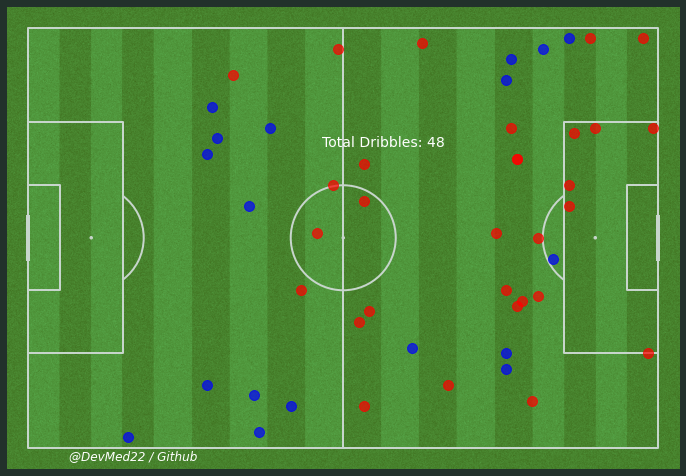

In [90]:
def dribbles(events):   
    fig, ax = plt.subplots(figsize=(13,8.5))
    fig.set_facecolor('#22312b')
    ax.patch.set_facecolor('#22312b')

    #The statsbomb pitch from mplsoccer
    pitch = Pitch(pitch_type='statsbomb', 
                  pitch_color='grass', line_color='#c7d5cc',stripe = True)

    pitch.draw(ax=ax)

    #I invert the axis to make it so I am viewing it how I want
    plt.gca().invert_yaxis()

    #plot the points, you can use a for loop to plot the different outcomes if you want
    x_h=[]
    y_h=[]
    x_w=[]
    y_w=[]
    for i,shot in events['dribbles'].iterrows():
      if events['dribbles']['possession_team'][i]==h:
        x_h.append(shot['location'][0])
        y_h.append(shot['location'][1])
      elif events['dribbles']['possession_team'][i]==w:
        x_w.append(shot['location'][0])
        y_w.append(shot['location'][1]) 

    # for i,shot in events['shots'][].iterrows():
    #     x.append(shot['location'][0])
    #     y.append(shot['location'][1])
        
    plt.scatter(x_h,y_h, s=100,c='red',alpha=.7)

    plt.scatter(x_w,y_w, s=100,c='blue',alpha=.7)

    # s=f'{h} Shots vs {w}'
    # fig_text(s=s,
    #         x=.27,y=.9,
    #         fontfamily='Andale Mono',
    #         fontsize=24,
    #         color=text_color)

    total_shots = len(events['dribbles'])

    fig_text(s=f'Total Dribbles: {total_shots}',
            x=.49, y =.67, fontsize=14,fontfamily='Andale Mono',color='white')

    fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='white')

    #plt.savefig('bcnjuveshots.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')
dribbles(events)

### Passes

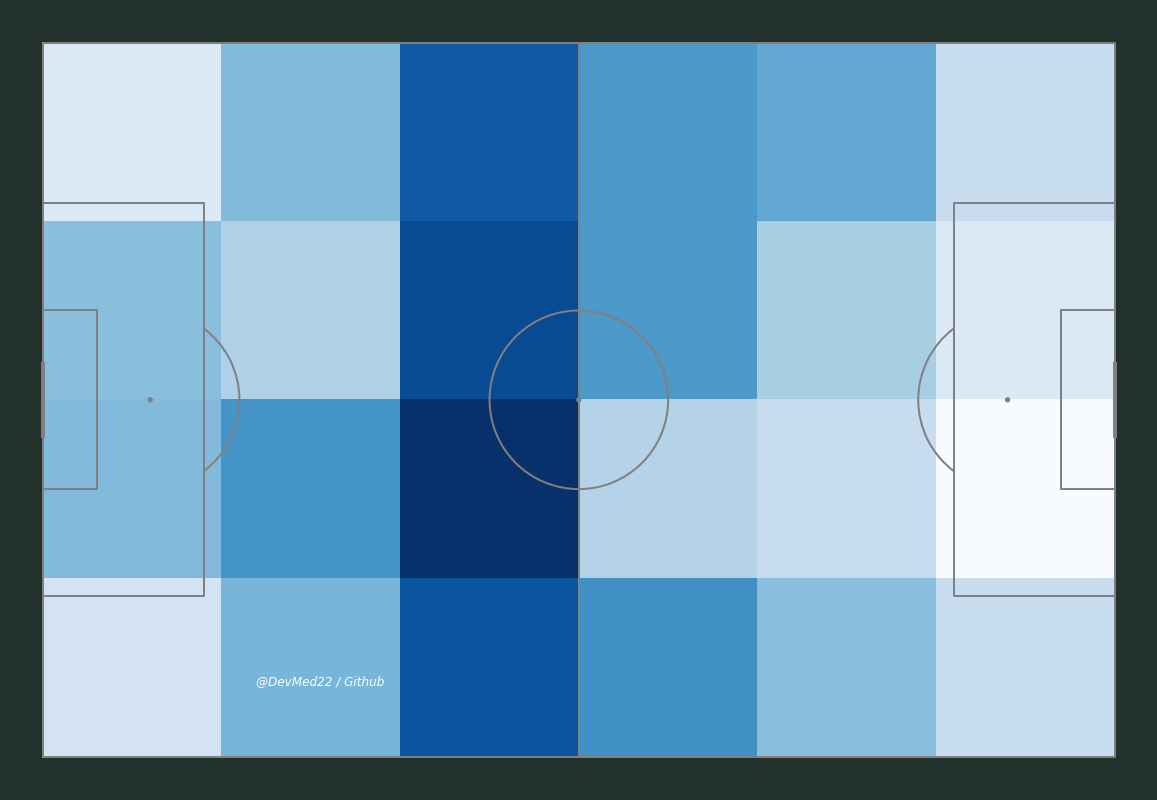

In [95]:
def home_team_passes(events,home_team):    
    x_h=[]
    y_h=[]

    for i,shot in events['passes'].iterrows():
      if events['passes']['possession_team'][i]==h:
        x_h.append(shot['location'][0])
        y_h.append(shot['location'][1])

    pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='gray', pitch_color='#22312b')
    bins = (6, 4)


    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='white')
    fig.set_facecolor('#22312b')
    # plot the heatmap - darker colors = more passes originating from that square

    bs_heatmap = pitch.bin_statistic(x_h, y_h, statistic='count', bins=bins)
    hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')
home_team_passes(events,h)

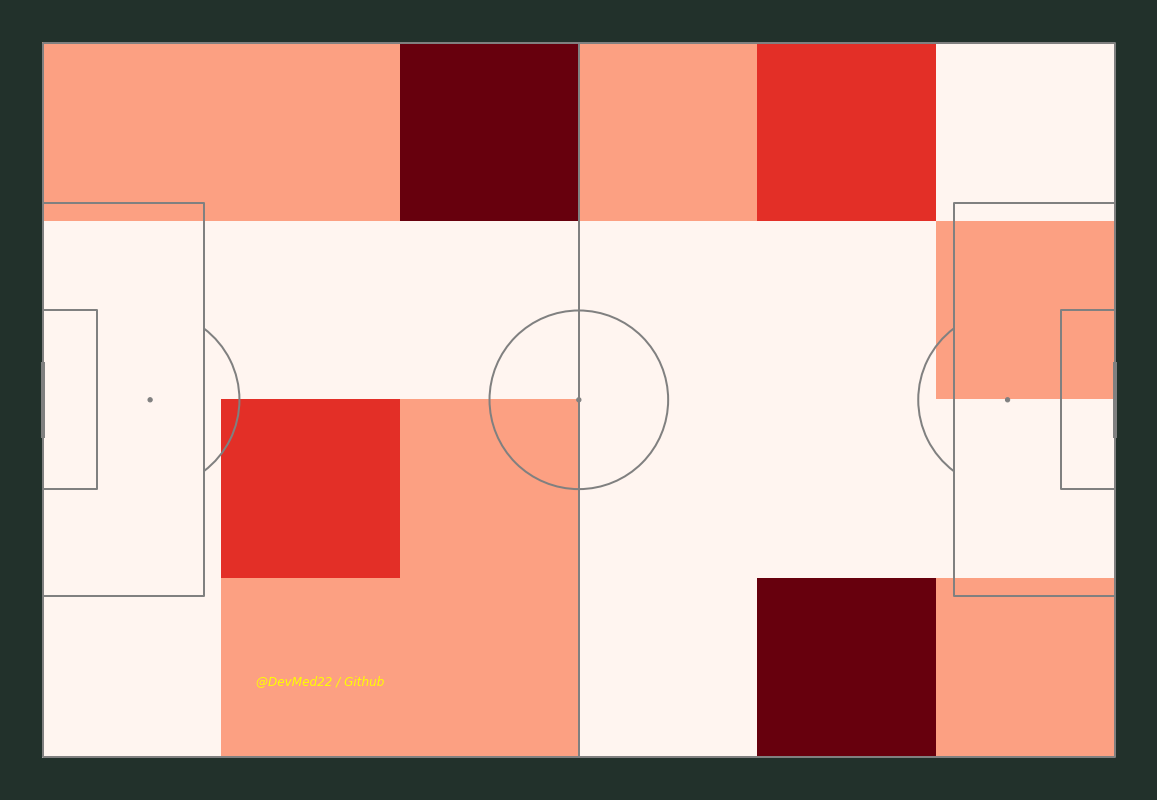

In [94]:
def away_team_passes(events,away_team):    
    x_w=[]
    y_w=[]
    for i,shot in events['dribbles'].iterrows():
      if events['dribbles']['possession_team'][i]==w:
        x_w.append(shot['location'][0])
        y_w.append(shot['location'][1]) 

    pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='gray', pitch_color='#22312b')
    bins = (6, 4)


    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='yellow')
    fig.set_facecolor('#22312b')
    # plot the heatmap - darker colors = more passes originating from that square

    bs_heatmap = pitch.bin_statistic(x_w, y_w, statistic='count', bins=bins)
    hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Reds')
away_team_passes(events,w)